# Predicting heart disease using machine learning

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [1]:
#Importing all the needed tools

#Regular EDA and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Models from SKlearn (classification models)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


#Model Evaluation Libraries
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score , recall_score , f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV

import warnings
warnings.filterwarnings("ignore")

## Data

In [2]:
#Loading data

df = pd.read_csv('heart-disease.csv')
df.shape

(303, 14)

In [3]:
#Data Exploration

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
#Finding out the number of classes present
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

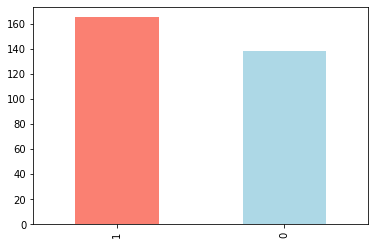

In [6]:
df['target'].value_counts().plot.bar(color=['salmon' , 'lightblue']);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
#Checking for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
#More numerical info on dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to sex

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
#Comparing target column with sex column
pd.crosstab(df.target , df.sex)

sex,0,1
target,,
0,24,114
1,72,93


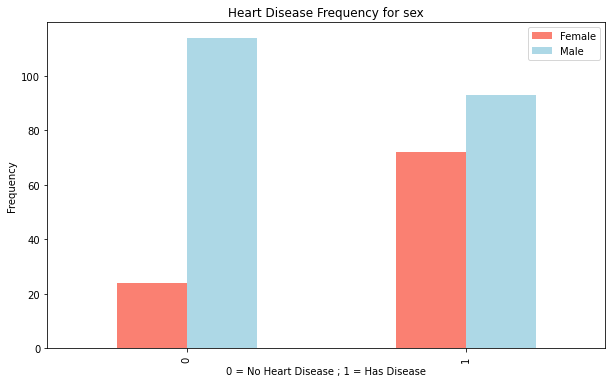

In [12]:
#Visualizing the relationship

pd.crosstab(df.target , df.sex).plot.bar(color=['salmon' , 'lightblue'] , figsize=(10 , 6));
plt.title('Heart Disease Frequency for sex')
plt.xlabel('0 = No Heart Disease ; 1 = Has Disease')
plt.ylabel('Frequency')
plt.legend(['Female' , 'Male']);

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
df['thalach'].value_counts() #visuaizing via bar graph not suitable due to numerous groups

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

## Age vs Max Heart Rate for Heart Disease

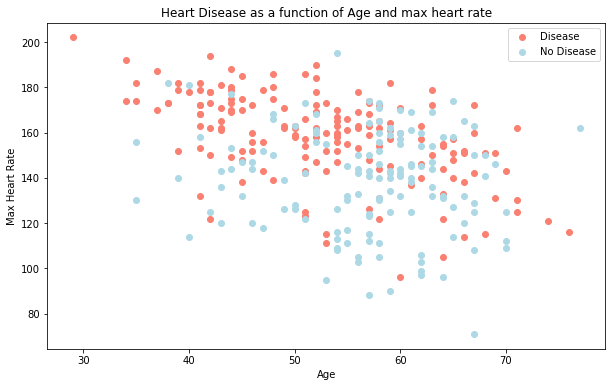

In [15]:
plt.figure(figsize=(10,6))

#Plotting positive values
plt.scatter(df.age[df['target'] == 1] , df.thalach[df['target'] == 1] , color=['salmon'])

#Plotting negative values
plt.scatter(df['age'][df['target'] == 0] , df['thalach'][df['target'] == 0] , color=['lightblue'])

plt.legend(['Disease' ,'No Disease'])
plt.title('Heart Disease as a function of Age and max heart rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate');

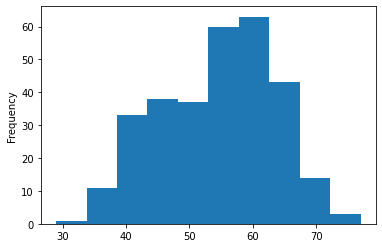

In [16]:
#Checking the age distributions
df.age.plot.hist(df.age);

## Heart disease frequency per chest pain type

* cp - chest pain type
0. Typical angina: chest pain related decrease blood supply to the heart
1. Atypical angina: chest pain not related to heart
2. Non-anginal pain: typically esophageal spasms (non heart related)
3. Asymptomatic: chest pain not showing signs of disease

In [17]:
pd.crosstab(df.cp , df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


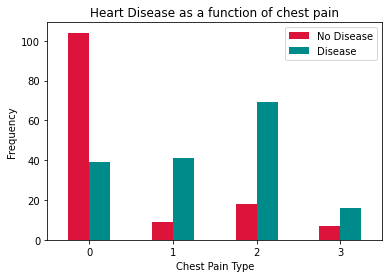

In [18]:
#Making it more visual
pd.crosstab(df.cp , df.target).plot(kind='bar' , color=['crimson' , 'darkcyan'])

plt.title('Heart Disease as a function of chest pain')
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(['No Disease','Disease']);

In [19]:
#Making a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


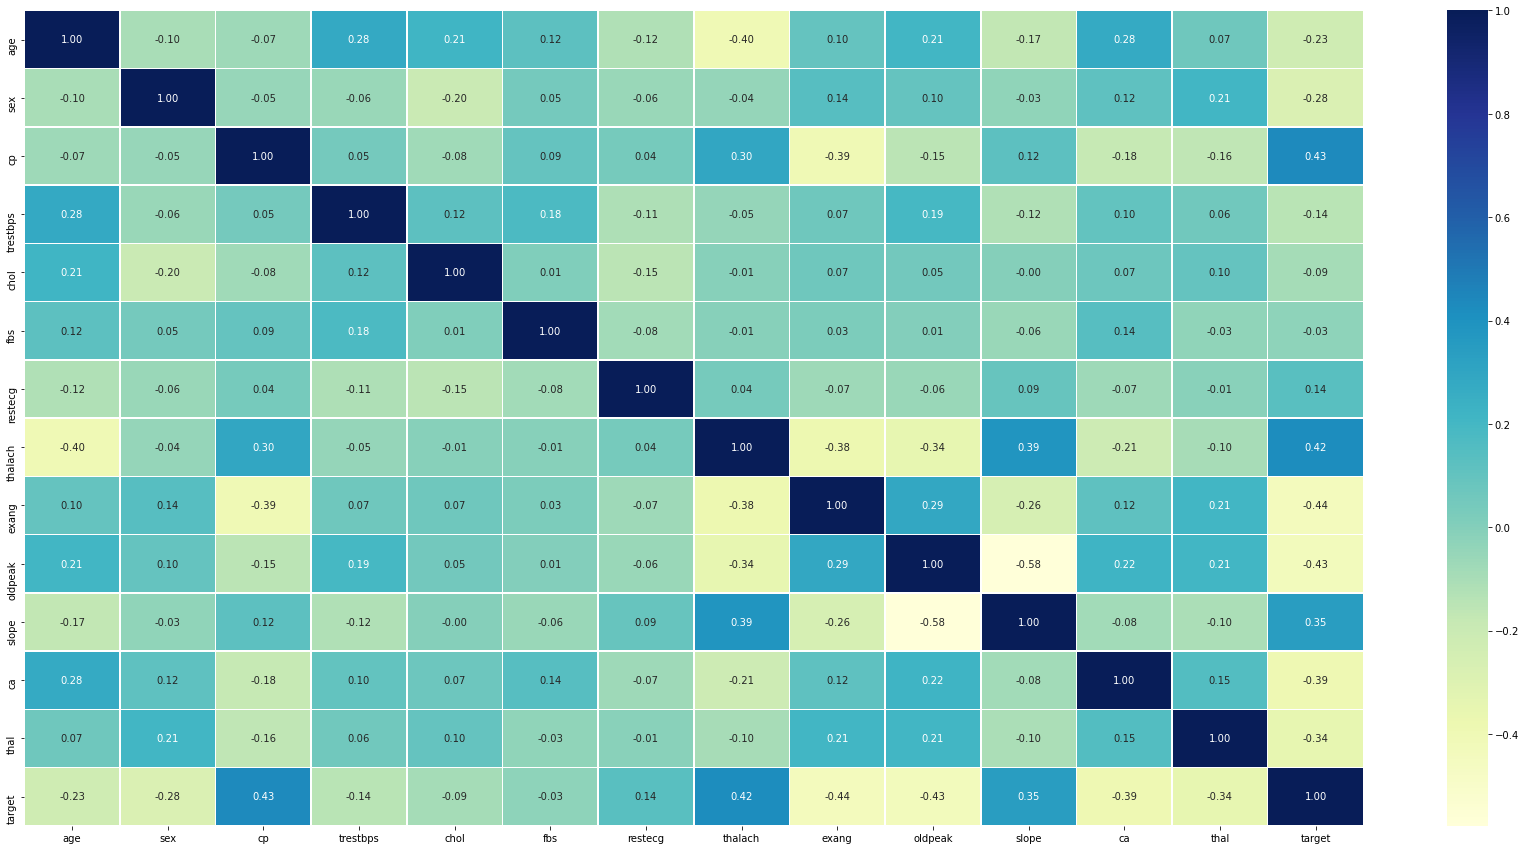

In [20]:
corr_mat = df.corr()
fig , ax = plt.subplots(figsize=(30 , 15))
ax = sns.heatmap(corr_mat , annot=True , linewidths=.5 , fmt='.2f' , cmap='YlGnBu');

## Modelling

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
#Split data into x and y
x = df.drop('target' , axis=1)
y = df['target']

x.shape , y.shape

((303, 13), (303,))

In [23]:
#Splitting data into train and test sets
np.random.seed(42)

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=.2)

In [24]:
from collections import OrderedDict
models = {
    'Logisitic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}

#creating a function to fit and score models
def fit_and_score(models , x_train , x_test , y_train , y_test):
    np.random.seed(42)
    
    model_scores = OrderedDict()
    
    for name , model in models.items():
        #Fitting each model
        model.fit(x_train , y_train)
        #Scoring and appending
        model_scores[name] = model.score(x_test , y_test)
        
    return model_scores

In [25]:
model_scores = fit_and_score(models , x_train , x_test , y_train , y_test)
model_scores

OrderedDict([('Logisitic Regression', 0.8852459016393442),
             ('KNN', 0.6885245901639344),
             ('Random Forest', 0.8360655737704918)])

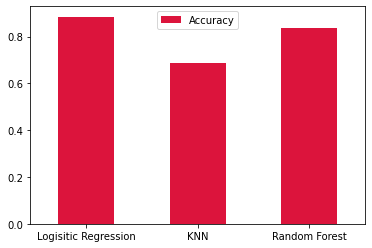

In [26]:
model_compare = pd.DataFrame(model_scores , index=['Accuracy'])
model_compare.T.plot.bar(color = ['crimson']);
plt.xticks(rotation = 0);

In [27]:
#Tunning the KNeighboursClassifier (Tunning by hand)

train_scores = []
test_scores = []

neighbors = range(1, 21)

KNN = KNeighborsClassifier()

for i in neighbors:
    #Fit into model
    KNN.set_params(n_neighbors = i)
    
    KNN.fit(x_train , y_train)
    
    train_scores.append(KNN.score(x_train , y_train))
    
    test_scores.append(KNN.score(x_test , y_test))
    

In [28]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [29]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

The maximum model performance is 75.41%


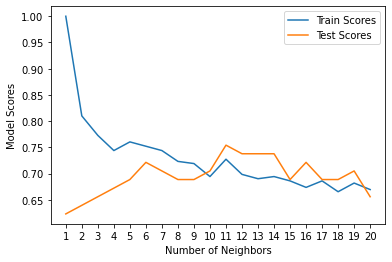

In [30]:
plt.plot(neighbors , train_scores ,label='Train Scores')
plt.plot(neighbors , test_scores,  label='Test Scores')
plt.xlabel('Number of Neighbors')
plt.ylabel('Model Scores')
plt.xticks(np.arange(1,21))
plt.legend();

print(f'The maximum model performance is {max(test_scores)*100:.2f}%')

## Hyperparameter Tunning with RandomizedSearchCv

* LogisticRegression()
* RandomForestClassifier()

In [31]:
#LogisticRegression grid params

log_reg_grid = {
    'C' : np.logspace(-4 , 4 , 20),
    'solver': ['liblinear']
}

#RandomForestClassifier grid params
rf_grid = {
    'n_estimators': np.arange(10 , 1000 , 50),
    'max_depth': [None, 3, 5, 10 ],
    'min_samples_split': np.arange(2 , 10 ,2),
    'min_samples_leaf': np.arange(1, 20, 2)
}

In [32]:
#Tuning Logistic Regression
np.random.seed(42)

#Applying the rsCV on the LogisticRegression model
rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions= log_reg_grid , cv=5 ,n_iter=20,verbose=True)

rs_log_reg.fit(x_train , y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [33]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [34]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

Logistic Regression tends to remain same after hyperparameter tunning

In [35]:
#Applying the rsCV to RandomForestClassifier

rs_rf_grid = RandomizedSearchCV(RandomForestClassifier(), 
                                param_distributions=rf_grid,
                                n_iter=20,
                                cv=5,
                                verbose=True)

rs_rf_grid.fit(x_train , y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([2, 4, 6, 8]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [36]:
rs_rf_grid.best_params_

{'n_estimators': 160,
 'min_samples_split': 6,
 'min_samples_leaf': 19,
 'max_depth': None}

In [37]:
rs_rf_grid.score(x_test , y_test)

0.8688524590163934

Slight imporvements have been observed in the value of the RandomForestClassifier, but still performs poorly compared to the Logistic Regression model

## Hyperparameter Tunning using GridSearchCV

* Since the LogisiticRegression model performs best.
* Fine tunning it to achieve better results

In [38]:
lg_reg_grid = {
    'C': np.logspace(-5 , 5, 30),
    'solver':['liblinear','lbfgs']
}

gd_log_reg = GridSearchCV(LogisticRegression() , param_grid=lg_reg_grid , cv=5 , verbose=True)

gd_log_reg.fit(x_train , y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    8.2s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 2.21221629e-05, 4.89390092e-05, 1.08263673e-04,
       2.39502662e-04, 5.29831691e-04, 1.17210230e-03, 2.59294380e-03,
       5.73615251e-03, 1.26896100e-02, 2.80721620e-02, 6.21016942e-02,
       1.37382380e-01, 3.03919538e-01, 6.72335754e-01, 1.48735211e+00,
       3.29034456e+00, 7.27895384e+00, 1.61026203e+01, 3.56224789e+01,
       7.88046282e+01, 1.74332882e+02, 3.85662042e+02, 8.53167852e+02,
       1.88739182e+03, 4.17531894e+03, 9.23670857e+03, 2.04335972e+04,
       4.52035366e+04, 1.00000000e+05]),
                         'solver': ['liblinear', 'lbfgs']},
             verbose=True)

In [39]:
gd_log_reg.best_params_

{'C': 0.1373823795883264, 'solver': 'liblinear'}

In [40]:
y_preds = gd_log_reg.predict(x_test)

In [41]:
gd_log_reg.score(x_test , y_test)

0.8852459016393442

# Model Evaluation

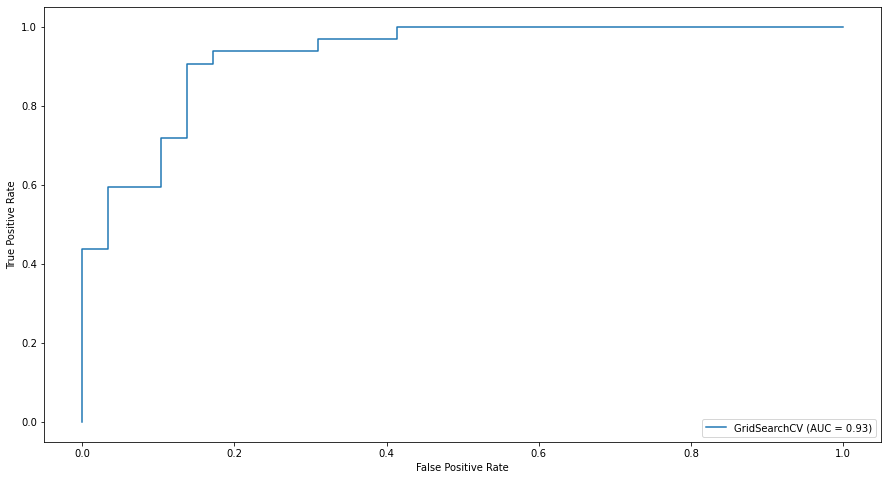

In [42]:
#ROC Curve
fig, ax = plt.subplots(figsize=(15,8))
plot_roc_curve(gd_log_reg , x_test , y_test, ax=ax );

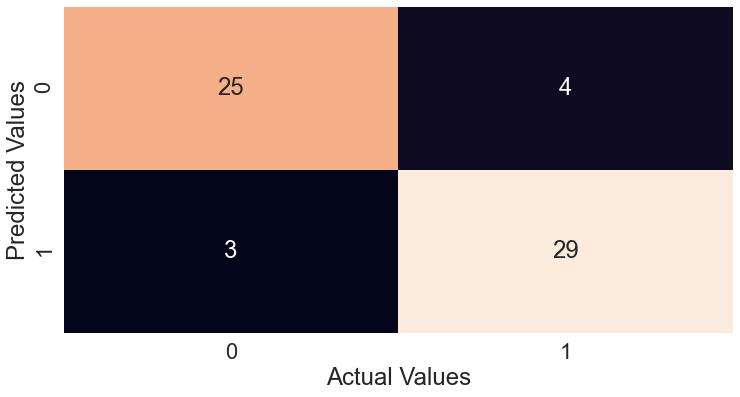

In [43]:
#Confusion_matrix

conf_mat = confusion_matrix(y_test , y_preds)

def plot_conf_mat(y_test , y_preds):
    sns.set(font_scale=2)
    fig , ax = plt.subplots(figsize=(12 , 6));
    
    ax = sns.heatmap(conf_mat , annot=True , cbar=False);
    
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    
plot_conf_mat(y_test , y_preds)

In [44]:
#Classification report

print(classification_report(y_test , y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [45]:
#Carrying out crossvalidation to improve evaluation scores

clf = gd_log_reg.best_estimator_

#Precision

clf_precision = cross_val_score(clf , x , y , scoring='precision')
clf_precision = np.mean(clf_precision)
clf_precision

0.8218912117692605

In [46]:
#Recall
clf_recall = cross_val_score(clf , x , y , scoring='recall')
clf_recall = np.mean(clf_recall)
clf_recall

0.9272727272727274

In [47]:
#f1
clf_f1 = cross_val_score(clf ,x ,y , scoring='f1')
clf_f1 = np.mean(clf_f1)
clf_f1

0.870410756901315

In [48]:
#acuuracy

clf_accuracy = cross_val_score(clf , x ,y ,scoring='accuracy')
clf_accuracy = np.mean(clf_accuracy)
clf_accuracy

0.8479781420765027

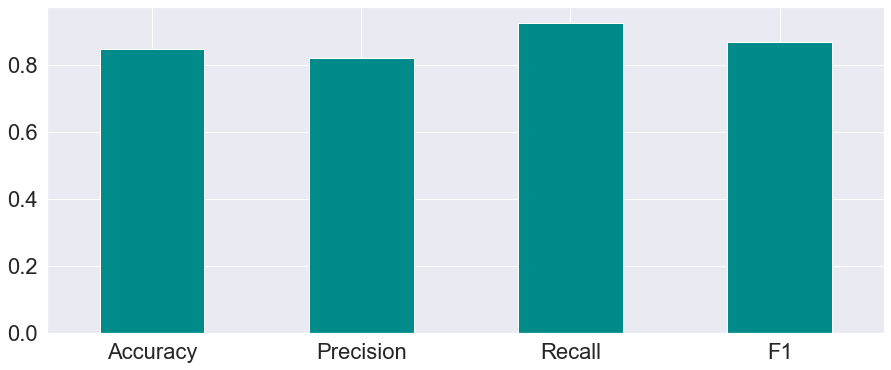

In [49]:
pd.DataFrame({
    'Accuracy': clf_accuracy,
    'Precision': clf_precision,
    'Recall':clf_recall,
    'F1': clf_f1
} , index=[0]).T.plot.bar(color=['darkcyan'] , legend=False, figsize=(15 , 6))
plt.xticks(rotation = 0);

## Feature Importance

In [51]:
#Fit an instance of Logistic Regression

clf = gd_log_reg.best_estimator_

clf.coef_

array([[ 0.00134287, -0.72656137,  0.61500822, -0.01153453, -0.00155289,
         0.03188443,  0.25406986,  0.02419149, -0.52054714, -0.54358459,
         0.38943001, -0.5885884 , -0.61035413]])

In [53]:
features = dict(zip(df.columns , clf.coef_[0]))
features

{'age': 0.0013428692992838226,
 'sex': -0.7265613700570591,
 'cp': 0.6150082224809758,
 'trestbps': -0.0115345333134123,
 'chol': -0.0015528892644047533,
 'fbs': 0.03188442580462178,
 'restecg': 0.25406985773822904,
 'thalach': 0.024191487590173578,
 'exang': -0.5205471386846544,
 'oldpeak': -0.5435845934927809,
 'slope': 0.3894300088852514,
 'ca': -0.5885883983924192,
 'thal': -0.6103541330045064}

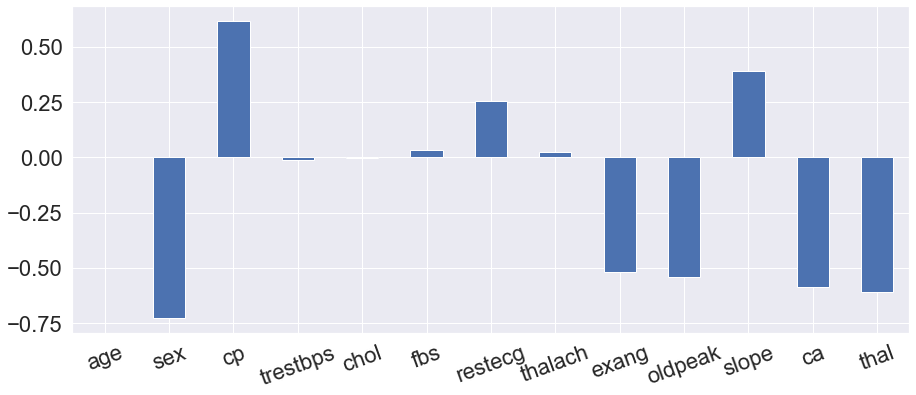

In [64]:
pd.DataFrame(features , index =[0]).T.plot.bar(figsize=(15 , 6),legend=False)
plt.xticks(rotation = 20);